# <p><center> **PROYECTO 06** </center></p>  

## Lectura de datos y primeras impresiones

En esta sección haré la lectura de datos, corregiré la lectura y daré un primer vistazo a el DataSet, comentaré mis observaciones y las posibles correcciones que realizaré en los siguientes pasos.

In [1]:
# importar librerías, las agregaré aquí a como las vaya utilizando
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
# lectura del DataSet
df = pd.read_csv('games.csv')

In [3]:
# mostrar información del DataSet
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1200,LEGO Pirates of the Caribbean: The Video Game,Wii,2011.0,Action,0.73,0.67,0.00,0.15,73.0,7,E10+
16361,PDC World Championship Darts 2009,Wii,2009.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
337,Assassin's Creed IV: Black Flag,PS3,2013.0,Action,1.33,1.68,0.13,0.57,88.0,8.1,M
12769,Generation of Chaos,PSP,2005.0,Role-Playing,0.05,0.00,0.00,0.00,60.0,7.7,T
16572,King's Bounty: Armored Princess,PC,2009.0,Role-Playing,0.00,0.01,0.00,0.00,82.0,8.6,T
3644,Contender 2,PS,2000.0,Fighting,0.31,0.21,0.00,0.04,NaN,tbd,T
12450,Biker Mice From Mars,PS2,2006.0,Racing,0.03,0.02,0.00,0.01,27.0,tbd,E10+
980,Professor Layton and the Mask of Miracle,3DS,2011.0,Puzzle,0.32,0.97,0.36,0.13,NaN,NaN,NaN
9492,Space Camp,Wii,2009.0,Action,0.12,0.00,0.00,0.01,NaN,6.2,E
1842,NBA Jam Tournament Edition,GEN,1994.0,Sports,0.95,0.14,0.00,0.03,NaN,NaN,NaN


Podemos ver varios detalles:
    
- La columnas tienen nombres con mayusculas, y nosotros las necesitamos en 'snake_case'.  
- La columna 'Year_of_release' está en tipo float.
- La columna 'User_Score' es tipo object y tiene valores extraños como 'tdb'.
- Vemos valores nulos en las columnas 'Name', 'Year_of_release', 'Genre', 'Critic_Score', 'User_score' y 'Rating'. 

Se irán atendiendo estos errores pero haré una revisión columna a columna.

## Corrección de errores en el DataSet

Haremos una profunda revisión a cada una de las columnas buscando:
- duplicados y sus causas
- nulos y sus causas
- errores en tipo

### columnas a snake_case

In [4]:
column_names = list(df.columns)
column_names = [x.lower() for x in column_names]
df.columns = column_names
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

No se observó ningun problema en particular, el cambio en los nombres de las columnas se realizó satisfactoriamente

### columna 'name':

Haremos una revisión de la columna name

#### valores nulos:

In [5]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Vemos dos valores nulos en name, son juegos de los cuales no poseemos el nombre, pero al tener las ventas podemos mantenerlos así, en futuros análisis podemos ponerlos en grupos como 'otros'

#### duplicados:

In [6]:
df[df['name'].duplicated(keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
12648,pro evolution soccer 2011,PC,2010.0,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


Tenemos casi 8000 nombres que se repiten, algunos de estos son lanzamientos del mismo juego en distintas consolas, no debemos eliminarlos. Creo que si se repite tanto en nombre como en plataforma tenemos juegos duplicados completamente, lo tomaré en cuenta en análisis mas profundos.

### columna 'platform':

Procederemos a analizar la columna 'platform'

#### valores nulos:

In [7]:
df[df['platform'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


No existen valores nulos

#### duplicados y únicos

In [8]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

No encontramos errores gramaticales en las plataformas. No tiene sentido buscar duplicados en esta columna.

### columna 'year_of_release'

Analizaremos la columna 'year_of_release'. en esta columna vimos que su valor era float. tenemos que saber si es float porque contiene valores no enteros, o si tiene ese tipo de variable por valores NaN.

In [9]:
# Aunque no creo que existan valores no enteros, haré una búsqueda para que me muestre aquellos valores que no sean enteros.
df_auxiliar = df.query('year_of_release % 1 != 0')
df_auxiliar['year_of_release'].unique()

array([nan])

Vemos que solo tenemos números enteros o nulos. los valores nulos se almacenan en variable Float64, por lo que no haré cambios en el tipo de dato de la columna.

#### valores nulos

In [10]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Tenemos 269 videojuegos que no tienen año de lamzamiento, podríamos buscar en internet los valores y enriquecer la tabla, pero por lo pronto lo dejaremos así. No tiene sentido buscar duplicados en esta columna.

### columna 'Genre'

No encontramos problemas en un primer vistazo, pero haremos un vistaso profundo en esta columna.

In [11]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

No tenemos generos con errores gramaticales, pero observamos que contiene valores nulos.

#### valores nulos:

In [12]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Es entendible que al no saber el nombre no tengamos información del género del juego, los matendré porque ocntienen ventas que pueden sumarse al año de 1993. No tiene sentido buscar duplicados en esta columna.

### Columna 'na_sales':

Vemos de entrada que tiene valores nulos, los cambiaré a 0 pues esto significa que no hubo ventas en la región.

#### valores nulos:

In [13]:
df['na_sales'] = df['na_sales'].fillna(0)
df['na_sales'].isna().sum()

np.int64(0)

Comprobamos que no tuviera nulos la columna. No tiene sentido buscar duplicados en esta columna.

### Columna 'eu_sales':

Haremos el mismo procedimiento que n la columna 'na_sales':

In [14]:
df['eu_sales'] = df['eu_sales'].fillna(0)
df['eu_sales'].isna().sum()

np.int64(0)

### Columna 'jp_sales':

Haremos el mismo procedimiento que n la columna 'na_sales':

In [15]:
df['jp_sales'] = df['jp_sales'].fillna(0)
df['jp_sales'].isna().sum()

np.int64(0)

### Columna 'other_sales':

Haremos el mismo procedimiento que n la columna anterior.

In [16]:
df['other_sales'] = df['other_sales'].fillna(0)
df['other_sales'].isna().sum()

np.int64(0)

### Columna 'critic_score':

En esta columna no se ve ningun problema. los vlaores nulos son debido a que no se tiene crítica sobre el juego, se mantendrá el valor nulo.

### columna 'user_score'

esta columna tiene el tipo object. significa que o tiene strings, o tiene el tipo de variable errado.

In [17]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [18]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [19]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [20]:
df['user_score'] = df['user_score'].astype('float64')

Vimos valores con 'tbd', la descripción del proyecto nos dice que significan 'to be determinated', las convertí en tipo NaN ya que no presentan ningun valor si no están determinados.

### Columna 'rating':

No vemos errores en la columna, pero vale la pena revisar si no hay errores gramaticales

In [21]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Todo bien en la columna 'rating', aunque vemos valores nulos no eliminaremos ninguno de estos datos.

### duplicados explicito e implicitos

Haremos la búsqueda de duplicados explicitos, y tambien de implícitos, para ser específicos buscaremos videojuegos con el mismo nombre en la misma plataforma.

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df[df[['name','platform']].duplicated(keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Tenemos variaas coincidencias. trataremos cada una individualmente.
 - Madden NFL para la PS3: este juego sale en el mismo año, dedusco que se registró dos veces en las ventas por lo que sumaremos las ventas del juego y eliminaremos uno de los registros.
 - Need for Speed Most Wantend tanto para X360 como para PC: tenemos dos registros porque es un relanzamiento, los manejaremos por separado
 - Sonic the Hedgehog para la PS3: sospecho que se registró dos veces porque las calificaciones son las mismas tanto de critica como de usuarios, las sumaré y eliminare uno de los registros.
 - NaN: al no tener información del nombre, no podemos deducir que se trate del mismo juego, manejaré los registros por separado.

In [24]:
# caso Madden NFL para la PS3
df.iloc[604,4:8] = df.iloc[604,4:8] + df.iloc[16230,4:8]
df = df.drop(16230)

# caso Sonic the Hedgehog para la PS3
df.iloc[1745,4:8] = df.iloc[1745,4:8] + df.iloc[4127,4:8]
df = df.drop(4127)

# resetear index
df = df.reset_index(drop=True)

In [25]:
df[df[['name','platform']].duplicated(keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5971,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11714,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14243,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Hemos eliminado los duplicados y reseteado los índices.

### vista final en la corrección de columnas

In [26]:
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16445 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           9947 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6538,Littlest Pet Shop: Friends,Wii,2009.0,Simulation,0.21,0.02,0.00,0.02,NaN,NaN,E
15211,Princess Saver! Eternal Love for My Lady,PS2,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13704,Little Busters! Converted Edition,PSP,2010.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3814,Mario Tennis: Power Tour,GBA,2005.0,Sports,0.24,0.09,0.19,0.01,81.0,8.0,E
602,Dragon Warrior II,NES,1987.0,Role-Playing,0.15,0.00,2.41,0.00,NaN,NaN,NaN
12879,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,0.00,0.05,0.00,0.01,NaN,NaN,E10+
5672,Momotarou Dentetsu Happy,SNES,1996.0,Misc,0.00,0.00,0.32,0.00,NaN,NaN,NaN
14683,Commander: Conquest of the Americas,PC,2010.0,Strategy,0.00,0.02,0.00,0.00,68.0,5.2,T
312,Monster Hunter 4 Ultimate,3DS,2014.0,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+


## Creación de nuevos datos

Crearemos una nueva columna llamada total_sales. esta columna contendrá la suma de las columnas jp_sales, na_sales, eu_sales y other_sales.

In [27]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3201,X-Man,2600,1982.0,Action,0.58,0.04,0.00,0.01,NaN,NaN,NaN,0.63
11306,Jaws: Ultimate Predator,Wii,2011.0,Action,0.08,0.00,0.00,0.01,NaN,6.3,T,0.09
10028,Persona 5,PS3,2016.0,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN,0.11
10500,Gem Quest: 4 Elements,DS,2011.0,Puzzle,0.05,0.05,0.00,0.01,NaN,NaN,E,0.11
1025,Madden NFL 99,PS,1998.0,Sports,1.66,0.04,0.00,0.04,NaN,NaN,NaN,1.74
1685,Cars,PSP,2006.0,Racing,0.72,0.28,0.00,0.20,70.0,7.0,E,1.20
6595,TOCA Race Driver 2: Ultimate Racing Simulator,PSP,2005.0,Racing,0.00,0.25,0.00,0.00,NaN,NaN,NaN,0.25
13375,Winter Sports 2011,PS3,2011.0,Sports,0.00,0.04,0.00,0.01,NaN,NaN,NaN,0.05
10338,Shrek: Forever After,X360,2010.0,Platform,0.10,0.00,0.00,0.01,62.0,6.2,E10+,0.11
9654,Nippon Daihyou Team no Kantoku ni Narou! Sekai...,SAT,1998.0,Sports,0.00,0.00,0.12,0.00,NaN,NaN,NaN,0.12


## análisis de datos

En esta sección analizaremos los datos conforme nos lo marcaron en la descripción del proyecto.

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

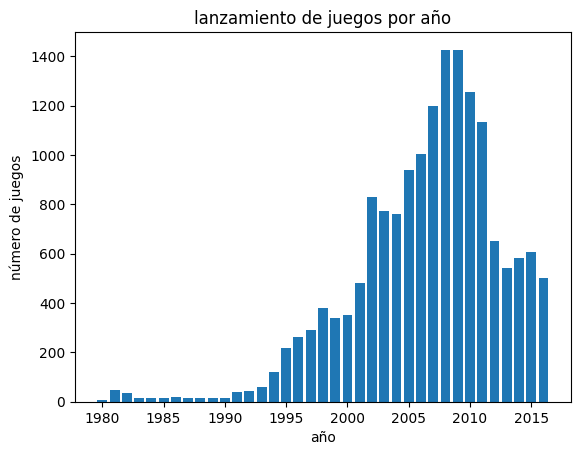

In [28]:
# dejo afuera los NaN porque no tiene sentido para contestar la pregunta
df_grouped_aux = df.groupby('year_of_release', as_index=False, dropna=True)['name'].count()

plt.bar(x = df_grouped_aux['year_of_release'], height = df_grouped_aux['name'])
plt.title("lanzamiento de juegos por año")
plt.xlabel("año")
plt.ylabel("número de juegos")
plt.show()

Primero haremos una descripción general, despues haré una explicación detallada ya que este tema me gusta mucho en particular.
 - Vemos que los lanzamientos de videojuegos comienzan a ser populares en 1981, pero caen y no es hasta la decada de los 90s que comienzan a despegar, teniendo su mayor pico entre el 2008 y 2009. Despues de eso se ve que ha dsiminuido la cantidad de videojuegos.

Ahora explicaremos lo que vemos de una forma mas profunda y teniendo en cuenta el contexto:
 - Vemos que desde que en 1981 hubo un pequeño pico que baja en 1983, esto coincide con uno de los golpes mas duros en los videojuegos, la crisis de los videojuegos en 1982 (el sello de nintendo en los videojuegos ayudó a que esta industria se salvara).
 - A partir de 1991 comienza a crecer las ventas de los videojuegos y la primera guerra de consolas: Nintendo vs Génesis. Durante ésta época los videjuegos fueron variados y con buena calidad teniendo su pico en 1998, la época del nintendo 64, dreamcast y play station.
 - En el 2002 vemos un pico mucho mas marcado, durante esta época es la segunda guerra de consolas, xbox y playstation2 se ponen en una dura competencia y al ser hardware de relativamente fácil acceso, se crean muchísimos videojuegos. se nota una pequeña caida hasta el 2004, que es cuando va pasando el furor principal de las consolas.
 - Durante el 2005 al 2008 vemos el mayor pico en los videojuegos, y la etapa en la que considero que los videojuegos permearon completamente en toda la sociedad, la playstation3, el exbox360 y la wii fueron 3 buenas consolas con una enorme deiversidad de videojuegos.
 - Se observa otra subida de videojuegos que comienza en el 2013, esto es por el lanzamiento de la xboxone y playstation4.
 - La caida en lanzamientos que comienza en el 2010 puede tener varias causas pero pienso que una de las razones mas importantes es la forma en la que se juega los videojuegos, durante estos años comienzan los "juegos en línea", videojuegos que se centran en una experiencia utilizando el internet como una herramienta para conectar a los distintos juegadores. El usar el internet es el comienzo de una forma distinta de ver los videojuegos, ya no como "productos que se venden" sino como "servicios a los que se les actualiza y se les da mantenimiento", como por ejemplo league of legends, starcraft, world of warcraft, etc.. 

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


In [29]:
df_grouped_auxiliar = df.groupby('platform', as_index=False)['total_sales'].sum()
df_grouped_auxiliar.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Wow! La playstation2 ha sido sin duda la mas exitosa, seguida de xbox360, playstation3 y wii. Mención honorifica a la DS, es una consola portatil y ha vendido muchísimos videojuegos.

Tomaremos las 5 consolas con mas ventas pra el análisis siguiente.

#### PlayStation2

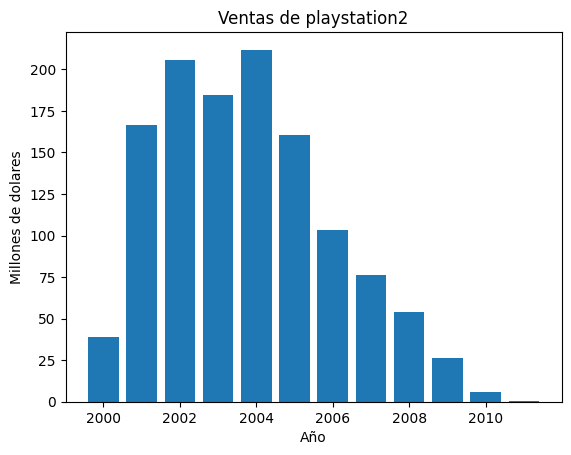

In [30]:
df_grouped_auxiliar = df.query('platform == "PS2"').groupby('year_of_release', as_index=False)['total_sales'].sum()
plt.bar(x=df_grouped_auxiliar["year_of_release"], height=df_grouped_auxiliar["total_sales"])

plt.title("Ventas de playstation2")
plt.xlabel("Año")
plt.ylabel("Millones de dolares")
plt.show()

Vemos un ciclo de vida de 12 años. Sobre su comportamiento podemos deducier que comenzó con un gran auge en el 2001 ycomienza a decaer a partir del 2003, y continua hasta el 2011. El lanzamiento de la playstation3(2006) y las nuevas tecnologías onfluye mucho en las ventas de la consola.

#### Xbox 360

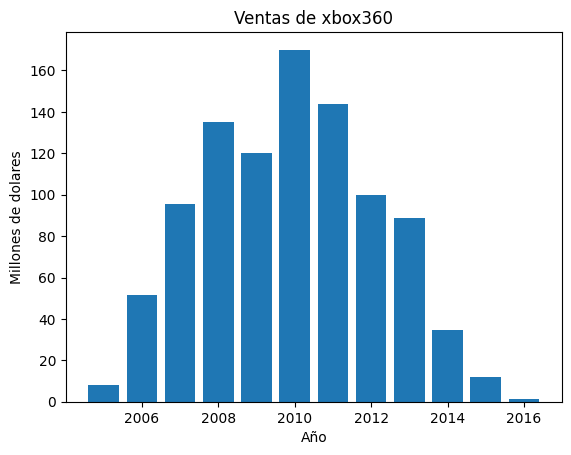

In [31]:
df_grouped_auxiliar = df.query('platform == "X360"').groupby('year_of_release', as_index=False)['total_sales'].sum()
plt.bar(x=df_grouped_auxiliar["year_of_release"], height=df_grouped_auxiliar["total_sales"])

plt.title("Ventas de xbox360")
plt.xlabel("Año")
plt.ylabel("Millones de dolares")
plt.show()

Ciclo de vida de 12 años. veo ciclo de vida muy "gaussiano", comenzó con pequeñas ventas y fue subiendo hasta su pico en el 2010 (alrededor de 160Mdd). su ultimo año en el 2016 se debe principalmente a las salida de Xbox one y las nuevas tecnologías que dejan la consola obsoleta.

#### Playstation3

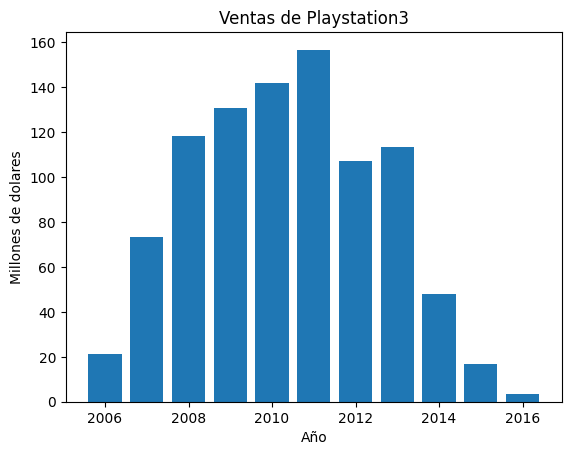

In [32]:
df_grouped_auxiliar = df.query('platform == "PS3"').groupby('year_of_release', as_index=False)['total_sales'].sum()
plt.bar(x=df_grouped_auxiliar["year_of_release"], height=df_grouped_auxiliar["total_sales"])

plt.title("Ventas de Playstation3")
plt.xlabel("Año")
plt.ylabel("Millones de dolares")
plt.show()

Ciclo de vida de 11 años. Vemos tambien unas que suben rápidamente debido al auge de la consola. las ventas comienzan a caer desde el 2011 (será que las personas intuyen que saldrá una nueva consola?) y cae definitivamente en el 2014 (la play4 sale a finales de 2013).

#### Wii

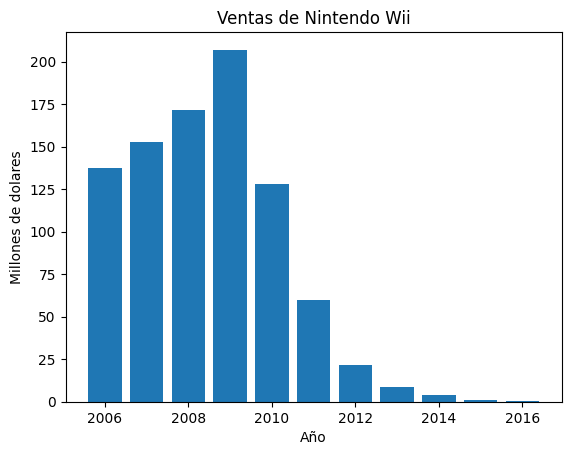

In [33]:
df_grouped_auxiliar = df.query('platform == "Wii"').groupby('year_of_release', as_index=False)['total_sales'].sum()
plt.bar(x=df_grouped_auxiliar["year_of_release"], height=df_grouped_auxiliar["total_sales"])

plt.title("Ventas de Nintendo Wii")
plt.xlabel("Año")
plt.ylabel("Millones de dolares")
plt.show()

Ciclo de vida de 11 años. Vemos un comportamiento muy distinto. se nota que fue una consola muy esperada por la comunidad. Comienza con fuertes ventas en el 2006 y sube hasta su mayor pico en el 2009. despues de eso baja drásiticamente, esto es antes de que salga la wiiU asi que no entiendo bien el por qué de su caida en ventas.

#### Nintendo DS

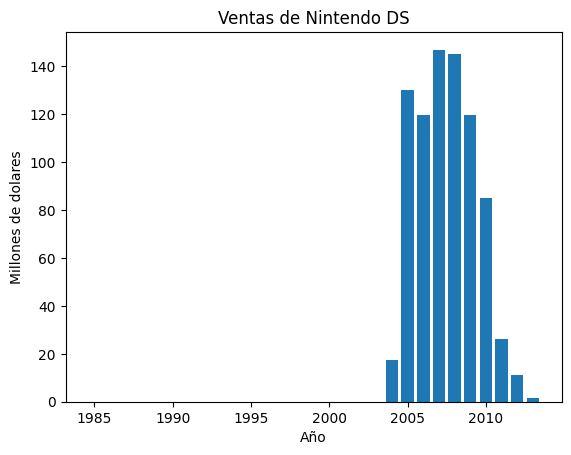

In [34]:
df_grouped_auxiliar = df.query('platform == "DS"').groupby('year_of_release', as_index=False)['total_sales'].sum()
plt.bar(x=df_grouped_auxiliar["year_of_release"], height=df_grouped_auxiliar["total_sales"])

plt.title("Ventas de Nintendo DS")
plt.xlabel("Año")
plt.ylabel("Millones de dolares")
plt.show()

Vemos algo inusual...

In [35]:
df_auxiliar = df.query("(year_of_release == 1985) and (platform == 'DS')")
df_auxiliar

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15956,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Hay un videojuego que tiene año de lanzamiento 1985, pero la consola no existía en ese año. Buscando por internet encuentro que el juego salió en el 2007. Modificaré el registro para que tenga el año correcto.

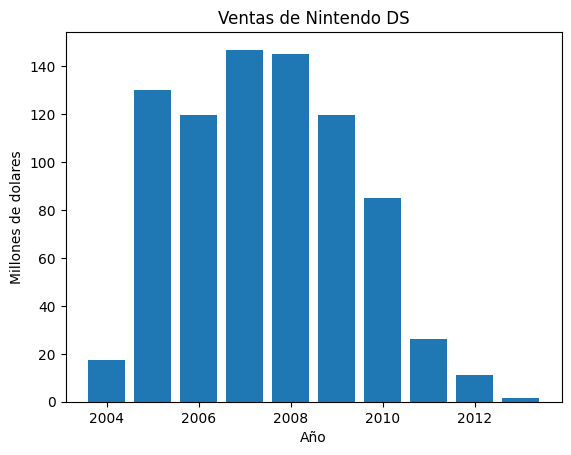

In [36]:
df.loc[15956,"year_of_release"] = 2007

df_grouped_auxiliar = df.query('platform == "DS"').groupby('year_of_release', as_index=False)['total_sales'].sum()
plt.bar(x=df_grouped_auxiliar["year_of_release"], height=df_grouped_auxiliar["total_sales"])

plt.title("Ventas de Nintendo DS")
plt.xlabel("Año")
plt.ylabel("Millones de dolares")
plt.show()


Ciclo de vida de 10 años. Vemos un comportamiento parecido a las otras consolas, comienzan muy fuerte, y despues de unos 4 años comienzan a bajar sus ventas.

#### Conclusiones.
Vemos que las consolas tienen un ciclo de vida de 11 años, esto debido principalmente a que surgen nuevas tecnologías en videojuegos y a que sale una consola que sustituye a la anterior.

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Tomando la información de las 5 consolas mas vendidas haré mis análisis a partir del 2000.

In [37]:
df = df.query("(year_of_release >= 2000) or (year_of_release.isna())").sort_values(by="year_of_release")
df['year_of_release'].unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,   nan])

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Analizaremos las consolas que mas venden en los últimos años, cuáles son las que venden mas y cuáles son las que venden menos.

#### Consola mas vendida en el 2016 (año mas reciente)

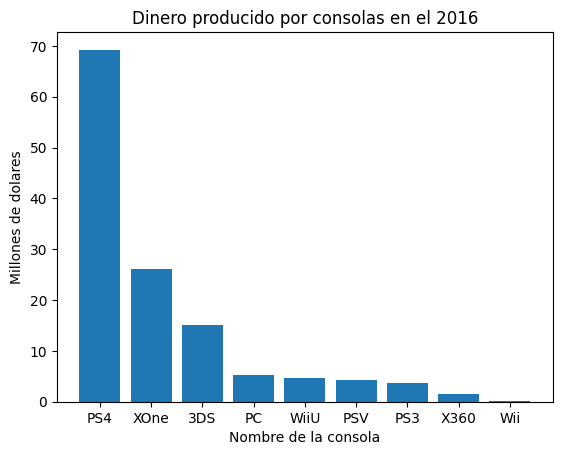

In [38]:
df_grouped_auxiliar = df.query("year_of_release >= 2016").groupby("platform", as_index=False)["total_sales"].sum()
df_grouped_auxiliar = df_grouped_auxiliar.sort_values(by="total_sales", ascending=False)

plt.bar(x=df_grouped_auxiliar["platform"], height=df_grouped_auxiliar["total_sales"])
plt.title("Dinero producido por consolas en el 2016")
plt.xlabel("Nombre de la consola")
plt.ylabel("Millones de dolares")
plt.show()

Claramente Playstation4 domina el mercado en el 2016, no obstante, hay que graficar para obtener mejores conclusiones. 

#### Comportamiento en ventas de los últimos años

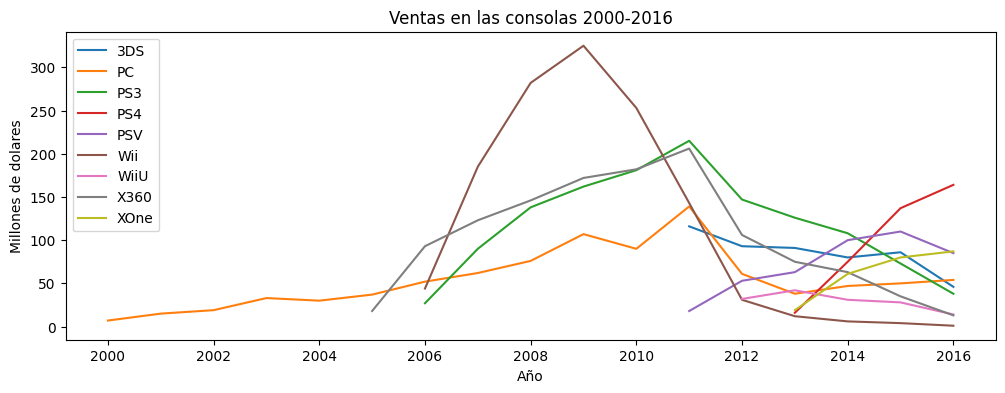

In [39]:
df_grouped_auxiliar = df.groupby(["platform", "year_of_release"], as_index=False)["total_sales"].count()
auxiliar_table = pd.pivot_table(df_grouped_auxiliar, index="platform", columns="year_of_release", values="total_sales")
# tomaremos solo las consolas que tengan ventas los últimos años
auxiliar_table = auxiliar_table.loc[["3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne"]]
auxiliar_table

plt.figure(figsize=(12,4))
plt.plot(auxiliar_table.columns,auxiliar_table.loc["3DS"])
plt.plot(auxiliar_table.columns,auxiliar_table.loc["PC"])
plt.plot(auxiliar_table.columns,auxiliar_table.loc["PS3"])
plt.plot(auxiliar_table.columns,auxiliar_table.loc["PS4"])
plt.plot(auxiliar_table.columns,auxiliar_table.loc["PSV"])
plt.plot(auxiliar_table.columns,auxiliar_table.loc["Wii"])
plt.plot(auxiliar_table.columns,auxiliar_table.loc["WiiU"])
plt.plot(auxiliar_table.columns,auxiliar_table.loc["X360"])
plt.plot(auxiliar_table.columns,auxiliar_table.loc["XOne"])
plt.title("Ventas en las consolas 2000-2016")
plt.xlabel("Año")
plt.ylabel("Millones de dolares")
plt.legend(["3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne"])
plt.show()

En el grafico anterior se observa el dinero generado por las consolas en los últimos años. Como se observó en los ejercicios anteriores, el comportamiento en el dinero generado es parecido a una gaussiana, por lo que esperamos que las consolas presenten ventas con este comportamiento (excepto ventas en PC). Dicho esto podemos predecir lo siguiente:
 - La consola PS4 aumentará sus ventas en el 2017
 - La consola Xbox One puede aumentar o disminuir sus ventas un poco, pero sigue siendo una opicón rentable.
 - La consola portatil Playstation Vita y la Nintendo 3DS comienzan a disminuir sus ventas pero le quedan unos cuantos años generando ingresos.
 - consolas como PS3, Wii, WiiU y Xbox 360 están al final de su ciclo de vida, dejaron de ser una opción rentable.
 
### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

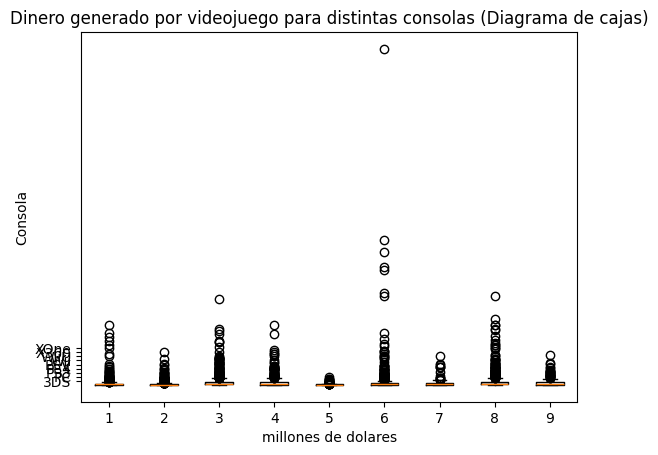

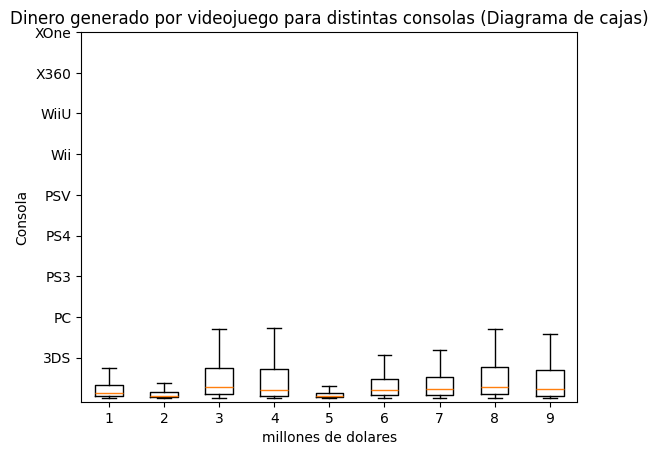

In [40]:
# guardaremos las distribuciones en distintas variables para distintas consolas
ventas_juegos_3ds = df.query("platform == '3DS'")["total_sales"]
ventas_juegos_pc = df.query("platform == 'PC'")["total_sales"]
ventas_juegos_ps3 = df.query("platform == 'PS3'")["total_sales"]
ventas_juegos_ps4 = df.query("platform == 'PS4'")["total_sales"]
ventas_juegos_psv = df.query("platform == 'PSV'")["total_sales"]
ventas_juegos_wii = df.query("platform == 'Wii'")["total_sales"]
ventas_juegos_wiiu = df.query("platform == 'WiiU'")["total_sales"]
ventas_juegos_x360 = df.query("platform == 'X360'")["total_sales"]
ventas_juegos_xone = df.query("platform == 'XOne'")["total_sales"]
aux = [
    ventas_juegos_3ds,
    ventas_juegos_pc,
    ventas_juegos_ps3,
    ventas_juegos_ps4,
    ventas_juegos_psv,
    ventas_juegos_wii,
    ventas_juegos_wiiu,
    ventas_juegos_x360,
    ventas_juegos_xone]

plt.boxplot(aux, vert=0)
plt.yticks(ticks=range(1,10), labels=["3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne"])
plt.title("Dinero generado por videojuego para distintas consolas (Diagrama de cajas)")
plt.ylabel("Consola")
plt.xlabel("millones de dolares")
plt.show()

plt.boxplot(aux, vert=0, showfliers=False)
plt.yticks(ticks=range(1,10), labels=["3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne"])
plt.title("Dinero generado por videojuego para distintas consolas (Diagrama de cajas)")
plt.ylabel("Consola")
plt.xlabel("millones de dolares")
plt.show()

Vemos que las distribuciones se comportan de manera similar: tienen una media baja pero contienen algunos videojuegos "atipicos" que generaron mas ventas que la mayoría de los otros juegos (un videojuego de Wii generó casi 80 millones por sí solo).
Las medias mas bajas con para PSV y para PC, intentaré explicar los motivos:
 - PSV: Al ser una consola portatil no muy popular, las ventas en los videojuegos no son muy altas
 - Pc: Al tener muchos juegos en circulación y con bajo presupuesto baja la media de toda la distribución.

Las medias para las demás consolas van en un rango desde los 0.2 millones hasta los 0.3 millones (calculado a ojo).

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

#### Reseña de críticos

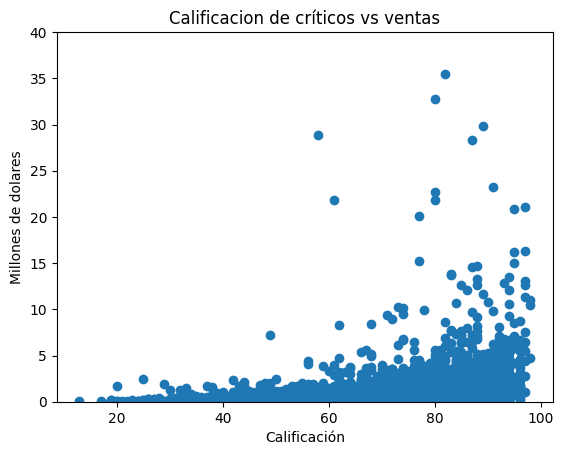

El coeficiente de correlación entre la calificación de los críticos y las ventas es de: 0.23842229043236726


In [41]:
plt.scatter(df["critic_score"], df["total_sales"])
plt.title("Calificacion de críticos vs ventas")
plt.xlabel("Calificación")
plt.ylabel("Millones de dolares")
plt.ylim([0,40])
plt.show()

correlacion = df.corr(numeric_only=True)
print("El coeficiente de correlación entre la calificación de los críticos y las ventas es de: {0}".format(correlacion.loc["critic_score","total_sales"]))

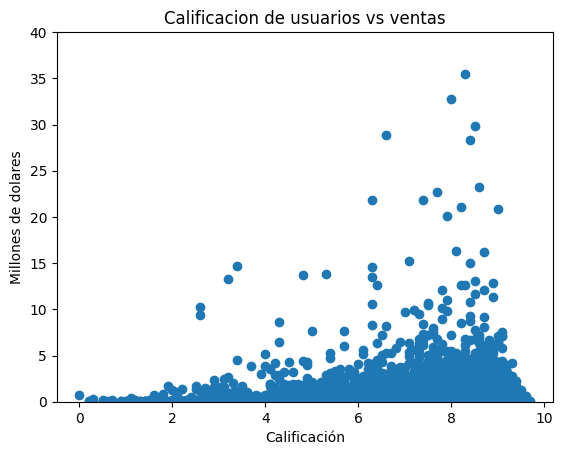

El coeficiente de correlación entre la calificación de los usuarios y las ventas es de: 0.08113715833241873


In [42]:
plt.scatter(df["user_score"], df["total_sales"])
plt.title("Calificacion de usuarios vs ventas")
plt.xlabel("Calificación")
plt.ylabel("Millones de dolares")
plt.ylim([0,40])
plt.show()

correlacion = df.corr(numeric_only=True)
print("El coeficiente de correlación entre la calificación de los usuarios y las ventas es de: {0}".format(correlacion.loc["user_score","total_sales"]))

Los coeficientes son bajos, al parecer la calificación de los videojuegos no influye mucho en sus ventas.
Tambien hay que ver que la opinión de los críticos pesa un poco mas que la opinión de los usuarios encuanto a ventas.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

Buscaremos juegos que salieron en al menos 2 de las 3 plataformas principales en el 2016: Xbox One, playstation4 y PC.

In [43]:
df_auxiliar = df[df['name'].duplicated(keep=False)].sort_values(by="name").loc[:,["name", "platform", "total_sales"]]
df_auxiliar_pc = df_auxiliar.query("platform == 'PC'")
df_auxiliar_xone = df_auxiliar.query("platform == 'XOne'")
df_auxiliar_ps4 = df_auxiliar.query("platform == 'PS4'")

print("la media de ventas (MDD) para videojuegos de PC:", df_auxiliar_pc["total_sales"].mean())
print("la media de ventas (MDD) para videojuegos de Xbox One:", df_auxiliar_xone["total_sales"].mean())
print("la media de ventas (MDD) para videojuegos de PlayStation4:", df_auxiliar_ps4["total_sales"].mean())

la media de ventas (MDD) para videojuegos de PC: 0.21916326530612243
la media de ventas (MDD) para videojuegos de Xbox One: 0.6030803571428571
la media de ventas (MDD) para videojuegos de PlayStation4: 0.8737694704049844


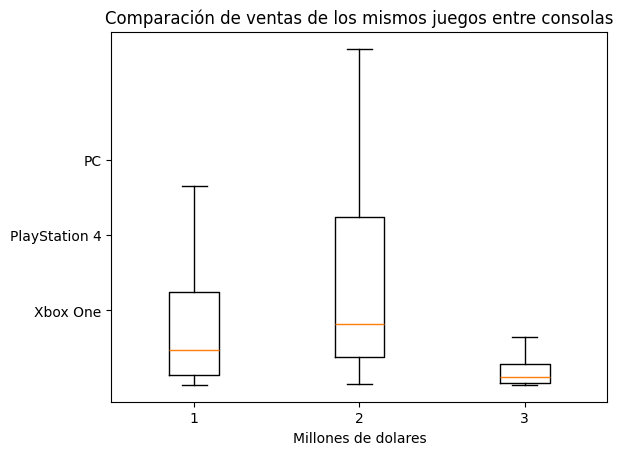

In [44]:
# Xbox one y Playstation4 y PC
df_auxiliar = pd.merge(df_auxiliar_xone, df_auxiliar_ps4, on="name", how="inner")
df_auxiliar = pd.merge(df_auxiliar, df_auxiliar_pc, on="name", how="inner")

plt.boxplot(df_auxiliar.loc[:, ["total_sales_x", "total_sales_y", "total_sales"]], vert=0, showfliers=False)
plt.yticks(ticks=[1, 2, 3], labels=["Xbox One", "PlayStation 4", "PC"])
plt.title("Comparación de ventas de los mismos juegos entre consolas")
plt.xlabel("Millones de dolares")
plt.show()

En promedio los mismos juegos venden mas en playstation4, luego en Xbox one y al final en PC. Con esto podemos conluir que si se va a realizar un nuevo juego, conviene hacerla para playstation4 y xboxone.


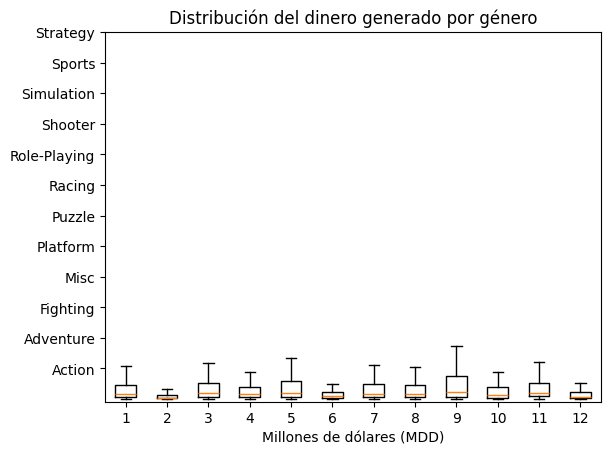

In [45]:
### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

df_action = df.query("genre == 'Action'")["total_sales"]
df_adventure = df.query("genre == 'Adventure'")["total_sales"]
df_fighting = df.query("genre == 'Fighting'")["total_sales"]
df_misc = df.query("genre == 'Misc'")["total_sales"]
df_platform = df.query("genre == 'Platform'")["total_sales"]
df_puzzle = df.query("genre == 'Puzzle'")["total_sales"]
df_racing = df.query("genre == 'Racing'")["total_sales"]
df_role = df.query("genre == 'Role-Playing'")["total_sales"]
df_shooter = df.query("genre == 'Shooter'")["total_sales"]
df_simulation = df.query("genre == 'Simulation'")["total_sales"]
df_sports = df.query("genre == 'Sports'")["total_sales"]
df_strategy = df.query("genre == 'Strategy'")["total_sales"]

plt.boxplot(
    [df_action, df_adventure, df_fighting, df_misc, df_platform, df_puzzle, df_racing, df_role, df_shooter, df_simulation, df_sports, df_strategy],
    vert=0,
    showfliers=False
)
plt.title("Distribución del dinero generado por género" )
plt.xlabel("Millones de dólares (MDD)")
plt.yticks(ticks=range(1,13), labels=df["genre"].sort_values().unique())

plt.show()

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

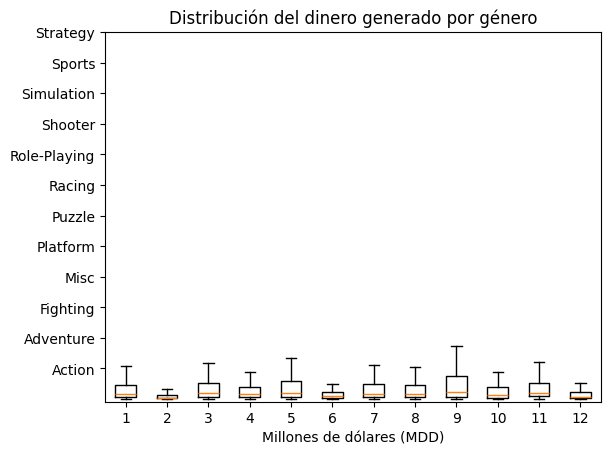

In [46]:
df_action = df.query("genre == 'Action'")["total_sales"]
df_adventure = df.query("genre == 'Adventure'")["total_sales"]
df_fighting = df.query("genre == 'Fighting'")["total_sales"]
df_misc = df.query("genre == 'Misc'")["total_sales"]
df_platform = df.query("genre == 'Platform'")["total_sales"]
df_puzzle = df.query("genre == 'Puzzle'")["total_sales"]
df_racing = df.query("genre == 'Racing'")["total_sales"]
df_role = df.query("genre == 'Role-Playing'")["total_sales"]
df_shooter = df.query("genre == 'Shooter'")["total_sales"]
df_simulation = df.query("genre == 'Simulation'")["total_sales"]
df_sports = df.query("genre == 'Sports'")["total_sales"]
df_strategy = df.query("genre == 'Strategy'")["total_sales"]

plt.boxplot(
    [df_action, df_adventure, df_fighting, df_misc, df_platform, df_puzzle, df_racing, df_role, df_shooter, df_simulation, df_sports, df_strategy],
    vert=0,
    showfliers=False
)
plt.title("Distribución del dinero generado por género" )
plt.xlabel("Millones de dólares (MDD)")
plt.yticks(ticks=range(1,13), labels=df["genre"].sort_values().unique())

plt.show()

Vemos que las medias de los juegos son cercanas (desde 0.1  a 0.25 MDD). pero los juegos shooter, platform, sports y fighting tienen mayores probabilidades de ser éxitos con mas de 1MDD generados.


## Estudio por regiones

### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.


In [47]:
df_platform_na = df.groupby("platform")["na_sales"].sum().sort_values(ascending=False).iloc[:5]
df_platform_eu = df.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).iloc[:5]
df_platform_jp = df.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).iloc[:5]

print("\n\nlas plataformas mas rentables para Norteamérica son: \n\n", df_platform_na)
print("\n\nlas plataformas mas rentables para unión europea son: \n\n", df_platform_eu)
print("\n\nlas plataformas mas rentables para Japón son: \n\n", df_platform_jp)



las plataformas mas rentables para Norteamérica son: 

 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64


las plataformas mas rentables para unión europea son: 

 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
DS      188.89
Name: eu_sales, dtype: float64


las plataformas mas rentables para Japón son: 

 platform
DS     175.57
PS2    139.20
3DS    100.67
PS3     80.19
PSP     76.78
Name: jp_sales, dtype: float64


Tienen mayores diferencias de las que pensaba, el xbox360 presentó mayores ventas en norteamérica, pero en las otras 2 regiones se quedó muy abajo. mientras que para europa las PlayStation arrazaron las demás consolas. Japón en cambio parece tener preferencias fuertes por consolas portátiles (ahora entiendo el por qué del intendo switch).

### Los cinco géneros principales. Explica la diferencia.

In [48]:
df_genre_na = df.groupby("genre")["na_sales"].sum().sort_values(ascending=False).iloc[:5]
df_genre_eu = df.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).iloc[:5]
df_genre_jp = df.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).iloc[:5]

print("\n\nlos generos mas rentables para Norteamérica son: \n\n", df_genre_na)
print("\n\nlos generos mas rentables para unión europea son: \n\n", df_genre_eu)
print("\n\nlos generos mas rentables para Japón son: \n\n", df_genre_jp)



los generos mas rentables para Norteamérica son: 

 genre
Action          768.11
Sports          602.62
Shooter         502.64
Misc            372.97
Role-Playing    283.07
Name: na_sales, dtype: float64


los generos mas rentables para unión europea son: 

 genre
Action     474.72
Sports     345.04
Shooter    296.84
Misc       198.85
Racing     194.04
Name: eu_sales, dtype: float64


los generos mas rentables para Japón son: 

 genre
Role-Playing    243.73
Action          133.54
Misc             86.52
Sports           76.49
Platform         55.39
Name: jp_sales, dtype: float64


norteamérica y europa tienen gustos similares en cuanto a géneros: Acción, deportes y disparos dominan las ventas.
Japón en cambio tiene gustos algo diferentes, los juegos de rol dominan el mercado seguido por acción y otros tipos de juegos. los videojuegos de disparos no son muy populares en esta región.

In [49]:
df_esrb_na = df.groupby("rating")["na_sales"].sum().sort_values(ascending=False).iloc[:5]
df_esrb_eu = df.groupby("rating")["eu_sales"].sum().sort_values(ascending=False).iloc[:5]
df_esrb_jp = df.groupby("rating")["jp_sales"].sum().sort_values(ascending=False).iloc[:5]

print("\n\nlas clasificaciones ESRB mas rentables para Norteamérica son: \n\n", df_esrb_na)
print("\n\nlas clasificaciones ESRB mas rentables para unión europea son: \n\n", df_esrb_eu)
print("\n\nlas clasificaciones ESRB mas rentables para Japón son: \n\n", df_esrb_jp)



las clasificaciones ESRB mas rentables para Norteamérica son: 

 rating
E       1268.01
M        733.39
T        722.01
E10+     353.32
EC         1.53
Name: na_sales, dtype: float64


las clasificaciones ESRB mas rentables para unión europea son: 

 rating
E       696.99
M       476.37
T       397.95
E10+    188.50
AO        0.61
Name: eu_sales, dtype: float64


las clasificaciones ESRB mas rentables para Japón son: 

 rating
E       190.06
T       131.71
M        58.50
E10+     40.20
AO        0.00
Name: jp_sales, dtype: float64


Las 3 regiones comparten preferencias similares en cuanto a la clasificación ESRB. los juegos mas populares son los juegos hechoas para todas las edades, seguidos por juegos para adultos y despues adolescentes.

## Pruebas de hipótesis

Se harán dos pruebas de hipótesis en esta sección.

 - Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
 - Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Para responder esta pregunta usaremos:
 - H0: Las calificaciones promedio de los usuarios para las plataformas de Xbox One y PC SON DIFERENTES
 - H1: Las calificaciones promedio de los usuarios para las plotaformas de Xbox One y PC SON LAS MISMAS
Si no podemos rechazar la hipótesis nula, podremos aceptar la alternativa. usaré una significancia del 5%.

Esta prueba es especial porque la hipótesis nula dice que son diferentes. entonces para que el umbral alpha (nuestra seguridad) sea del 5%  debemos tener un pvalue mayor a 1-alpha. esto quiere decir que el valor alpha nos diga que en el 95% de los casos, las distribuciones son las mismas.

In [50]:
df_xboxone = df.query("platform == 'XOne'")['user_score'].dropna()
df_pc = df.query("platform == 'PC'")['user_score'].dropna()

alpha = 0.05
prueba = st.ttest_ind(df_xboxone, df_pc, equal_var=False, alternative='two-sided')

if prueba.pvalue > 1-alpha:
    print('la hipótesis nula es rechazada, pvalue = {0}'.format(prueba.pvalue))
else:
    print('no podemos rechazar la hipótesis nula, pvalue = {0}'.format(prueba.pvalue))

no podemos rechazar la hipótesis nula, pvalue = 1.6650647460992076e-05


Observamos pvalue de 1.66 x10-5, esto nos dice que las distribuciones son diferentes, por lo tanto no podemos rechazar la hipótesis nula.


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Para responder esta pregunta usaremos:
 - H0: Las calificaciones promedio de los usuarios para los géneros de acción y deportes SON LAS MISMAS
 - H1: Las calificaciones promedio de los usuarios para los géneros de acción y deportes SON DIFERENTES
Si no podemos rechazar la hipótesis nula, podremos aceptar la alternativa. usaré una significancia del 5%.

In [51]:
df_accion = df.query("genre == 'Action'")['user_score'].dropna()
df_sports = df.query("genre == 'Sports'")['user_score'].dropna()

alpha = 0.05
prueba = st.ttest_ind(df_accion, df_sports, equal_var=False, alternative='two-sided')

if prueba.pvalue < alpha:
    print('la hipótesis nula es rechazada, pvalue = {0}'.format(prueba.pvalue))
else:
    print('no podemos rechazar la hipótesis nula, pvalue = {0}'.format(prueba.pvalue))

no podemos rechazar la hipótesis nula, pvalue = 0.1600621497268027


 el pvalue es de 0.16, no podemos rechazar la hipótesis nula pues existe un 16% de probabilidad de que las distribuciones sean las mismas y queremos una significacnia del 5%.
 
## Conclusiones

En este cuaderno se trabajó sobre una base de datos que incluía información sobre los videojuegos vendidos desde 1980 hasta 2016. la informacion cuenta con el nombre del juego, su género, su clasificación ESRB y tambien sus ventas en 3 regiones distintas: Japón, Norteamérica y Europa. EL trabajo en este cuaderno se divide en 4 etapas las cuales explicaré ahora.

 - Corrección de errores.
  - Se cambió el nombe de las columnas para que coincidiera con el formato snake_case.
  - se cambiaron los valores NaN en las columnas na_sales, jp_sales y eu_sales y other_sales a 0, ya que representan 0 ventas en sus repectivas regiones.
  - El valor 'tdb' (to be determined) de la columna user_score fue cambiado por un valor nulo, esto debido a que al no presentarse la calificación, no tiene sentido manejar otro tipo de dato.
  - Se cambiaron 2 renglones del DataSet y se eliminaron otros 2. El motibo de esto es que eran los mismos juegos registrados dos veces, se sumaron las ventas de uno de los duplicados y despues se eliminó el renglón. (para mas detalles ver la sección 2.13).
  - se corrigió un registro que contenía el año de lanzamiento erroneo. se buscó en internet el año de lanzamiento antes de modificar.
  
 - Creación de nuevos datos.
  - Se creó una columna llamada total_sales, en esta se incluyen la suma de las 4 columnas de ventas originales del dataset.
  
 - Análisis de datos.
  - Se hizó un análisis de los juegos lanzados en diferentes años y una gráfica de barras. Se dió una explicación del comportamiento de la gráfica detallando con sucesos históricos.
  - Se realizó un análizis del comportamiento en ventas para las 5 consolas mas vendidas. se encontró que poseen un comportamiento similar, teniendo una vida de ventas de al rededor de 11 años.
  - Se recortó el DataSet para contener información solo del 2000 en adelante, el motivo es que usar datos antiguos ya no es tan útil, pues contienen consolas obsoletas que no presentarán ventas futuras.
  - Se analizó cuál es la plataforma con mayores ventas en el 2016 (playstation4)
  - se realizó un diagrama de líneas en el que vemos el comportamiento de las consolas desde el 2000 al 2016. Observamos cuáles consolas comienzan su ciclo de vida y cuáles ya están por terminar el ciclo.
  - Se mostró con un diagrama de cajas las ventas de los videojuegos clasificadas por género, se sugiere los géneros con mayor potencial en ventas y los generos con menor potencial.
  - Se observó cómo la calificación de los críticos y los usuarios influyen en las ventas de los juegos. Se demostró con correlación que no estánrelacionadas fuertemente.
  - Se analizaron las ventas de los mismos videojuegos en 3 plataformas: PC, XboxOne y PlayStation 4. Los videojuegos venden mas en la plataforma playstation4 que en las otras 2 plataformas.
  - Se analizaron las distribuciones en ventas para los videojuegos clasificacados por género. los vodejuegos de acción, deportes y disparos presentan mayores ventas que otras categorías.
 - Estudio por regiones
  - Se hizo un análisis para cada una de las regiones en: géneros mas vendidos, clasificación ESRB mas rentables y plataformas mas rentables. Se sugirieron explicaciones de estos comportamientos. 